In [1]:
import os
import glob
import json
from collections import defaultdict

In [2]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt

In [3]:
from IPython.display import display

In [4]:
def read_jsonl(file_path):
    # Loop through the jsonl file, return a generator of dictionaries
    with open(file_path, 'r', encoding='utf-8') as file:
        for line in file:
            yield json.loads(line.strip())

In [5]:
from prompts import gpt_qa_simple_prompt_system, gpt_qa_simple_prompt_user

# OpenAI models

## gpt-4o

In [ ]:
base_dir_gpt = "../<placeholder>-interim/file_manual_v2/final-data-7k"
base_dir_gpt_2 = "../<placeholder>-interim/file_manual_v3/final-data-5k3"

# Get all files in the directory that end with output.jsonl

files = glob.glob(os.path.join(base_dir_gpt, "*output.jsonl"))
files.sort()
print(files)


files_2 = glob.glob(os.path.join(base_dir_gpt_2, "*output.jsonl"))
files_2.sort()
print(files_2)

['../venera-interim/file_manual_v2/final-data-7k/gpt-standard-gpt-4o_data-processed-shuffled0_batch_4dd0fcb2-7d53-4c6e-9552-5ffab741659b_output.jsonl', '../venera-interim/file_manual_v2/final-data-7k/gpt-standard-gpt-4o_data-processed-shuffled0_batch_6443533e-0239-4a0f-ab55-4225d85b6808_output.jsonl', '../venera-interim/file_manual_v2/final-data-7k/gpt-standard-gpt-4o_data-processed-shuffled0_batch_aa7d9ae0-11de-4813-bfe3-cf77132b4659_output.jsonl', '../venera-interim/file_manual_v2/final-data-7k/gpt-standard-gpt-4o_data-processed-shuffled1_batch_f928628a-88d4-4389-a538-2785f8f4ceba_output.jsonl', '../venera-interim/file_manual_v2/final-data-7k/gpt-standard-gpt-4o_data-processed-shuffled2_batch_ea38dcbd-8ff9-4b5d-ac88-24ca0a7d05d1_output.jsonl', '../venera-interim/file_manual_v2/final-data-7k/gpt-standard-o3-mini_data-processed-shuffled0_batch_e1aef5aa-ff95-4f64-ac58-3745ea2cc82a_output.jsonl', '../venera-interim/file_manual_v2/final-data-7k/gpt-standard-o3-mini_data-processed-shuffled

In [7]:

# Read jsonl files into a list of dictionaries
def read_jsonl(file_path):
    with open(file_path, "r") as f:
        return [json.loads(line) for line in f]

In [8]:
ANSWER_OPTIONS = ["A", "B", "C", "D"]

def get_df_base(path_to_file):
    df_base = []

    for row in read_jsonl(path_to_file):
        df_base.append((
            row["id"], 
            row["difficulty_level"],
            row["medical_topic"],
            row["question"],
            row["options"],
            row["answer"],
            row["answer_index"]
            ))
        
    df_base = pd.DataFrame(df_base, columns=[
        "id", "difficulty_level", "medical_topic", "question", "options", "correct_answer", "correct_index"])

    return df_base

df_base = get_df_base(f"{base_dir_gpt}/data-processed-shuffled0.jsonl")
df_base_2 = get_df_base(f"{base_dir_gpt_2}/data-processed-shuffled0.jsonl")


In [9]:
ORDERED_ID_LIST = df_base["id"].tolist()
print(len(ORDERED_ID_LIST))
ORDERED_ID_LIST_V2 = df_base_2["id"].tolist()
print(len(ORDERED_ID_LIST_V2))

7184
5304


In [10]:
df_base_2

,id,difficulty_level,medical_topic,question,options,correct_answer,correct_index
0,d29c07eb35614948bd3bda4f04bbfe44,Easy,"[Toxicology, Emergency Medicine]","_________ từ cá nóc gây tê liệt, sưng tấy và b...","[thuốc độc, bị đầu độc, độc hại, ngộ độc]",A,0
1,8265563a47d04952ab3f961710d03ddc,Medium,"[Psychiatry, Addiction Medicine]","…………uống rượu vô độ? ừ, đôi khi tôi thực sự sa...","[tội lỗi, uống vô độ, xã giao, uống rượu]",B,1
2,4cf7be10be564639aa387286c597b3df,Easy,"[Radiology, Nuclear Medicine]",.270. Trong hệ SI đơn vị để đo liều lượng hấp ...,"[J/kg, được đặt tên là Gray và ký hiệu là Gy.,...",A,0
3,ba283eb922164497a43d35f9981c8a94,Easy,"[Psychiatry, Addiction Medicine]",“Cold Turky” nghĩa là:,[Cai nghiện bằng cách cắt đứt hoàn toàn các ng...,A,0
4,da71a11d57244041876657f2b94ce435,Medium,[Obstetrics and Gynecology],* Các yếu tố dưới đây đều gây rối loạn tăng cơ...,"[Não úng thủy, Ngôi ngang, Đa ối, Khung chậu hẹp]",C,2
...,...,...,...,...,...,...,...
5299,16ccaeba2927462c8d26b847a9adbe23,Easy,"[Toxicology, Nephrology, Laboratory Medicine]",Nồng độ chì trong máu gây tổn thương thận:,"[10-25 µg /Dl, 25-60 µg /dL, 60-80 µg /dL, >80...",B,1
5300,fff2247e855c49989cc3a842b6340204,Medium,"[Cardiology, Laboratory Medicine]",Chọn tập hợp các xét nghiệm cần thiết để đánh ...,"[Cholesterol toàn phần, Triglycerid]",A,0
5301,b747b554cec84ed9aca6351d98b0328a,Medium,"[Parasitology, Laboratory Medicine]",Cơ sở của xét nghiệm gián tiếp,"[Phản ứng của cơ thể ký chủ khi bị ký sinh, Ph...",B,1
5302,53802ee8f156412d84837c39417a9fb9,Easy,"[Parasitology, Laboratory Medicine]",Bệnh phẩm cần lấy khi bị amibe ruột,"[Phân, Chất nhờn trong phân, Dịch tá tràng, Máu]",A,0


In [11]:
option_maps = {}
for shf_ver in range(3):
    option_maps[shf_ver] = dict()
    for row in read_jsonl(f"{base_dir_gpt}/data-processed-shuffled{shf_ver}.jsonl"):
        option_maps[shf_ver][row["id"]] = row["option_map"]
    for row in read_jsonl(f"{base_dir_gpt_2}/data-processed-shuffled{shf_ver}.jsonl"):
        option_maps[shf_ver][row["id"]] = row["option_map"]
len(option_maps[0]), len(option_maps[1]), len(option_maps[2])

(12488, 12488, 12488)

In [12]:
print(option_maps[0]["09432651c93140309f778dec7298a4e4"])
print(option_maps[1]["09432651c93140309f778dec7298a4e4"])
print(option_maps[2]["09432651c93140309f778dec7298a4e4"])

[0, 1, 2, 3]
[2, 0, 1, 3]
[1, 0, 2, 3]


In [13]:
["0,1%", "0.01", "0,5%", "1,5%"]

["0,5%", "0,1%", "0.01", "1,5%"]

["0.01", "0,1%", "0,5%", "1,5%"]


['0.01', '0,1%', '0,5%', '1,5%']

In [14]:
def unshuffle_option(shf_ver, q_id, answer):
    return ANSWER_OPTIONS[option_maps[shf_ver][q_id][ANSWER_OPTIONS.index(answer)]]

print(unshuffle_option(0, "09432651c93140309f778dec7298a4e4", "A"))
print(unshuffle_option(1, "09432651c93140309f778dec7298a4e4", "B"))
print(unshuffle_option(2, "09432651c93140309f778dec7298a4e4", "B"))

A
A
A


In [15]:
files

['../venera-interim/file_manual_v2/final-data-7k/gpt-standard-gpt-4o_data-processed-shuffled0_batch_4dd0fcb2-7d53-4c6e-9552-5ffab741659b_output.jsonl',
 '../venera-interim/file_manual_v2/final-data-7k/gpt-standard-gpt-4o_data-processed-shuffled0_batch_6443533e-0239-4a0f-ab55-4225d85b6808_output.jsonl',
 '../venera-interim/file_manual_v2/final-data-7k/gpt-standard-gpt-4o_data-processed-shuffled0_batch_aa7d9ae0-11de-4813-bfe3-cf77132b4659_output.jsonl',
 '../venera-interim/file_manual_v2/final-data-7k/gpt-standard-gpt-4o_data-processed-shuffled1_batch_f928628a-88d4-4389-a538-2785f8f4ceba_output.jsonl',
 '../venera-interim/file_manual_v2/final-data-7k/gpt-standard-gpt-4o_data-processed-shuffled2_batch_ea38dcbd-8ff9-4b5d-ac88-24ca0a7d05d1_output.jsonl',
 '../venera-interim/file_manual_v2/final-data-7k/gpt-standard-o3-mini_data-processed-shuffled0_batch_e1aef5aa-ff95-4f64-ac58-3745ea2cc82a_output.jsonl',
 '../venera-interim/file_manual_v2/final-data-7k/gpt-standard-o3-mini_data-processed-sh

In [16]:
n_runs = defaultdict(int)
n_runs_2 = defaultdict(int)

def process_gpt_files(files, n_runs, df_base):
    for file in files:
        print(file)
        if "gpt-4o" in file:
            model = "gpt-4o"
        elif "o3-mini" in file:
            model = "o3-mini"

        if "shuffled0" in file:
            shuffle_version = 0
        elif "shuffled1" in file:
            shuffle_version = 1
        elif "shuffled2" in file:
            shuffle_version = 2

        n_runs[f"{model}__sf{shuffle_version}"] += 1

        col_name = f"{model}__sf{shuffle_version}__run{n_runs[f'{model}__sf{shuffle_version}']}"
        data__ = []
        for i, row in enumerate(read_jsonl(file)):
            try:
                answer__ = json.loads(row["response"]["body"]["choices"][0]["message"]["content"])["answer"]
                answer__ = unshuffle_option(shuffle_version, row["custom_id"], answer__)
            except Exception:
                print(f"Error parsing answer for row {i} in file {file}")
                continue
                
            custom_id__ = row["custom_id"]
            data__.append((
                custom_id__, 
                answer__
                ))
        data__ = pd.DataFrame(data__, columns=["id", col_name])
        data__ = data__.set_index("id")
        df_base = df_base.join(data__, on="id", how="left")
        print(f"df_base shape: {df_base.shape}")
        
    return df_base

df_base = process_gpt_files(files, n_runs, df_base)
df_base_2 = process_gpt_files(files_2, n_runs_2, df_base_2)

    

../venera-interim/file_manual_v2/final-data-7k/gpt-standard-gpt-4o_data-processed-shuffled0_batch_4dd0fcb2-7d53-4c6e-9552-5ffab741659b_output.jsonl
Error parsing answer for row 646 in file ../venera-interim/file_manual_v2/final-data-7k/gpt-standard-gpt-4o_data-processed-shuffled0_batch_4dd0fcb2-7d53-4c6e-9552-5ffab741659b_output.jsonl
Error parsing answer for row 928 in file ../venera-interim/file_manual_v2/final-data-7k/gpt-standard-gpt-4o_data-processed-shuffled0_batch_4dd0fcb2-7d53-4c6e-9552-5ffab741659b_output.jsonl
Error parsing answer for row 944 in file ../venera-interim/file_manual_v2/final-data-7k/gpt-standard-gpt-4o_data-processed-shuffled0_batch_4dd0fcb2-7d53-4c6e-9552-5ffab741659b_output.jsonl
Error parsing answer for row 1039 in file ../venera-interim/file_manual_v2/final-data-7k/gpt-standard-gpt-4o_data-processed-shuffled0_batch_4dd0fcb2-7d53-4c6e-9552-5ffab741659b_output.jsonl
Error parsing answer for row 1041 in file ../venera-interim/file_manual_v2/final-data-7k/gpt-st

In [17]:
df_base.head(2)

,id,difficulty_level,medical_topic,question,options,correct_answer,correct_index,gpt-4o__sf0__run1,gpt-4o__sf0__run2,gpt-4o__sf0__run3,gpt-4o__sf1__run1,gpt-4o__sf2__run1,o3-mini__sf0__run1,o3-mini__sf1__run1,o3-mini__sf2__run1
0,33ec4246710149efab9d56f1141847d3,Easy,"[Urology, Nephrology]",Yếu tố thuận lợi hình thành sỏi là gì?,"[Nam giới., Thừa cân., Tuổi <40 tuổi., Ăn uống...",D,3,D,D,D,D,D,B,B,B
1,ff7c0f1ecd5b4708bb7c6f1617d4b1a8,Easy,[Urology],Tiểu máu cuối dòng thường do tổn thương ở:,"[Niệu quản, Bàng quang, Niệu đạo, Thận]",B,1,C,C,C,B,C,B,B,B


In [18]:
df_base_2["difficulty_level"].value_counts(), df_base_2["medical_topic"].value_counts()

(difficulty_level
 Medium         2642
 Easy           2105
 Challenging     470
 Hard             87
 Name: count, dtype: int64,
 medical_topic
 [Molecular Biology]                                     84
 [Obstetrics and Gynecology]                             66
 [Biochemistry]                                          56
 [Genetics]                                              53
 [Parasitology]                                          51
                                                         ..
 [Neurology, Hematology]                                  1
 [Neurology, Geriatrics, Eastern Medicine]                1
 [Endocrinology, Preventive Healthcare]                   1
 [Neurology, Other(No Category)]                          1
 [Rheumatology, Physical Medicine and Rehabilitation]     1
 Name: count, Length: 1716, dtype: int64)

In [ ]:
DIFFICULTY_LEVELS = ["Easy", "Medium", "Challenging"]

In [20]:
def get_accuracy(df, model_name=None, model_cols=None):
    """
    Calculate the accuracy of the model's predictions.
    """
    # Get the columns that start with the model name
    if model_name is None and model_cols is None:
        raise ValueError("Either model_name or model_cols must be provided.")
    elif model_cols is None:
        model_cols = [col for col in df.columns if col.startswith(model_name)]
    
    
    # Calculate accuracy for each column
    accuracies_data = []
    for col_ in model_cols:
        # Calculate accuracy for each difficulty level
        for lvl in DIFFICULTY_LEVELS:
            df__ = df[df["difficulty_level"] == lvl].copy()
            cnt_correct_ = (df__["correct_answer"] == df__[col_]).sum()
            cnt_total_ = df__[col_].notna().sum()

            accuracies_data.append((col_, lvl, cnt_correct_, cnt_total_, cnt_correct_ / cnt_total_ if cnt_total_ > 0 else 0))

        cnt_correct_ = (df["correct_answer"] == df[col_]).sum()
        cnt_total_ = df[col_].notna().sum()
        accuracies_data.append((col_, "All", cnt_correct_, cnt_total_, cnt_correct_ / cnt_total_ if cnt_total_ > 0 else 0))

    
    df_accuracy = pd.DataFrame(accuracies_data, columns=["model_run", "difficulty_level", "cnt_correct", "cnt_total", "accuracy"])
    
    return df_accuracy

In [21]:
get_accuracy(df_base_2, "gpt-4o")

,model_run,difficulty_level,cnt_correct,cnt_total,accuracy
0,gpt-4o__sf0__run1,Easy,1566,2098,0.746425
1,gpt-4o__sf0__run1,Medium,1880,2634,0.713743
2,gpt-4o__sf0__run1,Challenging,325,468,0.694444
3,gpt-4o__sf0__run1,All,3829,5287,0.724229
4,gpt-4o__sf0__run2,Easy,1568,2102,0.745956
5,gpt-4o__sf0__run2,Medium,1884,2638,0.714177
6,gpt-4o__sf0__run2,Challenging,335,469,0.714286
7,gpt-4o__sf0__run2,All,3844,5296,0.725831
8,gpt-4o__sf0__run3,Easy,1559,2100,0.742381
9,gpt-4o__sf0__run3,Medium,1901,2638,0.720622


In [22]:
# get_accuracy(df_base, "o3-mini")

# Llama-4-Maverick

In [ ]:
base_dir = "../<placeholder>-interim/file_manual_v2/llama4-maverick"
base_dir_v2 = "../<placeholder>-interim/file_manual_v3/llama4-maverick"
# Get all files in the directory that end with output.jsonl

files = glob.glob(os.path.join(base_dir, "*run*.jsonl"))
files.sort()
files

files_2 = glob.glob(os.path.join(base_dir_v2, "*run*.jsonl"))
files_2.sort()
files_2

['../venera-interim/file_manual_v3/llama4-maverick/llama-4-maverick-17b-128e-instruct_newdata-processed-shuffled0_run1.jsonl',
 '../venera-interim/file_manual_v3/llama4-maverick/llama-4-maverick-17b-128e-instruct_newdata-processed-shuffled0_run2.jsonl',
 '../venera-interim/file_manual_v3/llama4-maverick/llama-4-maverick-17b-128e-instruct_newdata-processed-shuffled0_run3.jsonl',
 '../venera-interim/file_manual_v3/llama4-maverick/llama-4-maverick-17b-128e-instruct_newdata-processed-shuffled1_run4.jsonl',
 '../venera-interim/file_manual_v3/llama4-maverick/llama-4-maverick-17b-128e-instruct_newdata-processed-shuffled2_run5.jsonl']

In [24]:
llama_maverick_file_indexes = {
    1: "llama4-maverick__sf0__run1",
    2: "llama4-maverick__sf0__run2",
    3: "llama4-maverick__sf0__run3",
    4: "llama4-maverick__sf1__run1",
    5: "llama4-maverick__sf2__run1",
}

In [25]:
def process_llama_files(files, llama_maverick_file_indexes, df_base):
    for file in files:
        print(file)
        if "shuffled0" in file:
            shuffle_version = 0
        elif "shuffled1" in file:
            shuffle_version = 1
        elif "shuffled2" in file:
            shuffle_version = 2

        if "run1" in file:
            run_number = 1
        elif "run2" in file:
            run_number = 2
        elif "run3" in file:
            run_number = 3
        elif "run4" in file:
            run_number = 4
        elif "run5" in file:
            run_number = 5

        col_name = llama_maverick_file_indexes[run_number]
        
        data__ = []
        for i, row in enumerate(read_jsonl(file)):
            custom_id__ = row["custom_id"][5:]

            try:
                answer__ = json.loads(row["response"]["body"]["choices"][0]["message"]["content"])["answer"]
                answer__ = unshuffle_option(shuffle_version, custom_id__, answer__)
            except Exception:
                print(f"Error parsing answer for row {i} in file {file}")
                continue
                
            data__.append((
                custom_id__, 
                answer__
                ))
        data__ = pd.DataFrame(data__, columns=["id", col_name])
        data__ = data__.set_index("id")
        df_base = df_base.join(data__, on="id", how="left")
        print(f"df_base shape: {df_base.shape}")
        
    return df_base

df_base = process_llama_files(files, llama_maverick_file_indexes, df_base)
df_base_2 = process_llama_files(files_2, llama_maverick_file_indexes, df_base_2)

../venera-interim/file_manual_v2/llama4-maverick/llama-4-maverick-17b-128e-instruct_data-processed-shuffled0_run1.jsonl
Error parsing answer for row 1177 in file ../venera-interim/file_manual_v2/llama4-maverick/llama-4-maverick-17b-128e-instruct_data-processed-shuffled0_run1.jsonl
Error parsing answer for row 1914 in file ../venera-interim/file_manual_v2/llama4-maverick/llama-4-maverick-17b-128e-instruct_data-processed-shuffled0_run1.jsonl
Error parsing answer for row 1964 in file ../venera-interim/file_manual_v2/llama4-maverick/llama-4-maverick-17b-128e-instruct_data-processed-shuffled0_run1.jsonl
Error parsing answer for row 3648 in file ../venera-interim/file_manual_v2/llama4-maverick/llama-4-maverick-17b-128e-instruct_data-processed-shuffled0_run1.jsonl
Error parsing answer for row 4817 in file ../venera-interim/file_manual_v2/llama4-maverick/llama-4-maverick-17b-128e-instruct_data-processed-shuffled0_run1.jsonl
Error parsing answer for row 5170 in file ../venera-interim/file_manua

In [26]:
get_accuracy(df_base, "llama4-maverick")

,model_run,difficulty_level,cnt_correct,cnt_total,accuracy
0,llama4-maverick__sf0__run1,Easy,1467,2006,0.731306
1,llama4-maverick__sf0__run1,Medium,3197,4445,0.719235
2,llama4-maverick__sf0__run1,Challenging,509,723,0.704011
3,llama4-maverick__sf0__run1,All,5174,7177,0.720914
4,llama4-maverick__sf0__run2,Easy,1473,2005,0.734663
5,llama4-maverick__sf0__run2,Medium,3194,4444,0.718722
6,llama4-maverick__sf0__run2,Challenging,513,723,0.709544
7,llama4-maverick__sf0__run2,All,5181,7175,0.722091
8,llama4-maverick__sf0__run3,Easy,1469,2006,0.732303
9,llama4-maverick__sf0__run3,Medium,3189,4444,0.717597


In [27]:
get_accuracy(df_base_2, "llama4-maverick")

,model_run,difficulty_level,cnt_correct,cnt_total,accuracy
0,llama4-maverick__sf0__run1,Easy,1532,2105,0.727791
1,llama4-maverick__sf0__run1,Medium,1870,2638,0.708870
2,llama4-maverick__sf0__run1,Challenging,322,470,0.685106
3,llama4-maverick__sf0__run1,All,3779,5300,0.713019
4,llama4-maverick__sf0__run2,Easy,1535,2105,0.729216
5,llama4-maverick__sf0__run2,Medium,1867,2638,0.707733
6,llama4-maverick__sf0__run2,Challenging,324,470,0.689362
7,llama4-maverick__sf0__run2,All,3782,5300,0.713585
8,llama4-maverick__sf0__run3,Easy,1535,2105,0.729216
9,llama4-maverick__sf0__run3,Medium,1862,2638,0.705838


# Claude 3.5 Sonnet

In [ ]:
base_dir_claude = "../<placeholder>-interim/file_manual_v2/claude-3-5-sonnet"
base_dir_claude_2 = "../<placeholder>-interim/file_manual_v3/claude-3-5-sonnet"
# Get all files in the directory that end with output.jsonl

files_claude_3_5_sonnet = glob.glob(os.path.join(base_dir_claude, "*run*.jsonl"))
files_claude_3_5_sonnet.sort()
files_claude_3_5_sonnet

files_claude_3_5_sonnet_2 = glob.glob(os.path.join(base_dir_claude_2, "*run*.jsonl"))
files_claude_3_5_sonnet_2.sort()
files_claude_3_5_sonnet_2

['../venera-interim/file_manual_v3/claude-3-5-sonnet/claude-3-5-sonnet_newdata-processed-shuffled0_run1.jsonl',
 '../venera-interim/file_manual_v3/claude-3-5-sonnet/claude-3-5-sonnet_newdata-processed-shuffled0_run2.jsonl',
 '../venera-interim/file_manual_v3/claude-3-5-sonnet/claude-3-5-sonnet_newdata-processed-shuffled0_run3.jsonl',
 '../venera-interim/file_manual_v3/claude-3-5-sonnet/claude-3-5-sonnet_newdata-processed-shuffled1_run4.jsonl',
 '../venera-interim/file_manual_v3/claude-3-5-sonnet/claude-3-5-sonnet_newdata-processed-shuffled2_run5.jsonl']

In [29]:
claude_3_5_sonnet_file_indexes = {
    1: "claude-3-5-sonnet__sf0__run1",
    2: "claude-3-5-sonnet__sf0__run2",
    3: "claude-3-5-sonnet__sf0__run3",
    4: "claude-3-5-sonnet__sf1__run1",
    5: "claude-3-5-sonnet__sf2__run1",
}

In [30]:
df_base = process_llama_files(files_claude_3_5_sonnet, claude_3_5_sonnet_file_indexes, df_base)
df_base_2 = process_llama_files(files_claude_3_5_sonnet_2, claude_3_5_sonnet_file_indexes, df_base_2)

../venera-interim/file_manual_v2/claude-3-5-sonnet/claude-3-5-sonnet_data-processed-shuffled0_run1.jsonl
Error parsing answer for row 646 in file ../venera-interim/file_manual_v2/claude-3-5-sonnet/claude-3-5-sonnet_data-processed-shuffled0_run1.jsonl
Error parsing answer for row 1426 in file ../venera-interim/file_manual_v2/claude-3-5-sonnet/claude-3-5-sonnet_data-processed-shuffled0_run1.jsonl
Error parsing answer for row 1431 in file ../venera-interim/file_manual_v2/claude-3-5-sonnet/claude-3-5-sonnet_data-processed-shuffled0_run1.jsonl
Error parsing answer for row 1435 in file ../venera-interim/file_manual_v2/claude-3-5-sonnet/claude-3-5-sonnet_data-processed-shuffled0_run1.jsonl
Error parsing answer for row 1438 in file ../venera-interim/file_manual_v2/claude-3-5-sonnet/claude-3-5-sonnet_data-processed-shuffled0_run1.jsonl
Error parsing answer for row 1439 in file ../venera-interim/file_manual_v2/claude-3-5-sonnet/claude-3-5-sonnet_data-processed-shuffled0_run1.jsonl
Error parsing 

In [31]:
# for file in files_claude_3_5_sonnet:
#     print(file)
#     if "shuffled0" in file:
#         shuffle_version = 0
#     elif "shuffled1" in file:
#         shuffle_version = 1
#     elif "shuffled2" in file:
#         shuffle_version = 2

#     if "run1" in file:
#         run_number = 1
#     elif "run2" in file:
#         run_number = 2
#     elif "run3" in file:
#         run_number = 3
#     elif "run4" in file:
#         run_number = 4
#     elif "run5" in file:
#         run_number = 5

#     col_name = claude_3_5_sonnet_file_indexes[run_number]
    
#     data__ = []
#     for i, row in enumerate(read_jsonl(file)):
#         custom_id__ = row["custom_id"][5:]

#         try:
#             answer__ = json.loads(row["response"]["body"]["choices"][0]["message"]["content"])["answer"]
#             answer__ = unshuffle_option(shuffle_version, custom_id__, answer__)
#         except Exception:
#             print(f"Error parsing answer for row {i} in file {file}")
#             continue
            
#         data__.append((
#             custom_id__, 
#             answer__
#             ))
#     data__ = pd.DataFrame(data__, columns=["id", col_name])
#     data__ = data__.set_index("id")
#     df_base = df_base.join(data__, on="id", how="left")
#     print(f"df_base shape: {df_base.shape}")

In [32]:
get_accuracy(df_base_2, "claude-3-5-sonnet")

,model_run,difficulty_level,cnt_correct,cnt_total,accuracy
0,claude-3-5-sonnet__sf0__run1,Easy,1513,2102,0.719791
1,claude-3-5-sonnet__sf0__run1,Medium,1851,2636,0.702200
2,claude-3-5-sonnet__sf0__run1,Challenging,323,470,0.687234
3,claude-3-5-sonnet__sf0__run1,All,3742,5295,0.706704
4,claude-3-5-sonnet__sf0__run2,Easy,1525,2103,0.725155
5,claude-3-5-sonnet__sf0__run2,Medium,1851,2640,0.701136
6,claude-3-5-sonnet__sf0__run2,Challenging,334,470,0.710638
7,claude-3-5-sonnet__sf0__run2,All,3765,5300,0.710377
8,claude-3-5-sonnet__sf0__run3,Easy,1498,2102,0.712655
9,claude-3-5-sonnet__sf0__run3,Medium,1851,2638,0.701668


# Qwen 3

In [ ]:
base_dir_qwen3 = "../<placeholder>-interim/file_manual_v2/qwen-3/Qwen/Qwen3-32B"
base_dir_qwen3_2 = "../<placeholder>-interim/file_manual_v3/qwen-3"
# Get all files in the directory that end with output.jsonl

files_qwen3 = glob.glob(os.path.join(base_dir_qwen3, "*.csv"))
files_qwen3.sort()
files_qwen3

files_qwen3_2 = glob.glob(os.path.join(base_dir_qwen3_2, "*.jsonl"))
files_qwen3_2.sort()
files_qwen3_2

['../venera-interim/file_manual_v3/qwen-3/data-processed-shuffled0.jsonl',
 '../venera-interim/file_manual_v3/qwen-3/data-processed-shuffled1.jsonl',
 '../venera-interim/file_manual_v3/qwen-3/data-processed-shuffled2.jsonl']

In [34]:
df_base_combined = pd.concat([df_base[["id"]], df_base_2[["id"]]], axis=0).reset_index(drop=True)
ORDERED_ID_LIST_COMB = df_base_combined["id"].tolist()
df_base_combined

,id
0,33ec4246710149efab9d56f1141847d3
1,ff7c0f1ecd5b4708bb7c6f1617d4b1a8
2,d54747bde2c74c308988edd8e0a03d6b
3,f2866faa628243e7b864d9babbb1e48a
4,098b4e461dec44428168dccbe22787de
...,...
12483,16ccaeba2927462c8d26b847a9adbe23
12484,fff2247e855c49989cc3a842b6340204
12485,b747b554cec84ed9aca6351d98b0328a
12486,53802ee8f156412d84837c39417a9fb9


In [35]:
errors_list = []
for file in files_qwen3_2:
    print(file)
    if "shuffled0" in file:
        shuffle_version = 0
    elif "shuffled1" in file:
        shuffle_version = 1
    elif "shuffled2" in file:
        shuffle_version = 2
    
    col_name = f"qwen3__sf{shuffle_version}__run1"

    qwen_df = pd.read_csv(file)
    qwen_df["ans"] = qwen_df["answer0"].apply(lambda x: x.strip()[-1])

    list_answer = []
    for i, ans_ in enumerate(qwen_df["ans"].tolist()):
        try:
            answer__ = unshuffle_option(shuffle_version, ORDERED_ID_LIST_COMB[i], ans_)
        except Exception:
            errors_list.append((i, ans_, ORDERED_ID_LIST_COMB[i], shuffle_version))
            answer__ = None
        list_answer.append(answer__)
    
    print("ORDERED_ID_LIST_COMB", len(ORDERED_ID_LIST_COMB))
    print("list_answer", len(list_answer))
    df_out_ = pd.DataFrame({
        "id": ORDERED_ID_LIST_COMB,
        col_name: list_answer
    })
    df_base_combined = df_base_combined.join(df_out_.set_index("id"), on="id", how="left")
    print(f"df_base_combined shape: {df_base_combined.shape}")
    print(f"Errors: {len(errors_list)}")



../venera-interim/file_manual_v3/qwen-3/data-processed-shuffled0.jsonl
ORDERED_ID_LIST_COMB 12488
list_answer 12488
df_base_combined shape: (12488, 2)
Errors: 16
../venera-interim/file_manual_v3/qwen-3/data-processed-shuffled1.jsonl
ORDERED_ID_LIST_COMB 12488
list_answer 12488
df_base_combined shape: (12488, 3)
Errors: 39
../venera-interim/file_manual_v3/qwen-3/data-processed-shuffled2.jsonl
ORDERED_ID_LIST_COMB 12488
list_answer 12488
df_base_combined shape: (12488, 4)
Errors: 58


In [36]:
df_base_combined

,id,qwen3__sf0__run1,qwen3__sf1__run1,qwen3__sf2__run1
0,33ec4246710149efab9d56f1141847d3,D,D,D
1,ff7c0f1ecd5b4708bb7c6f1617d4b1a8,C,B,C
2,d54747bde2c74c308988edd8e0a03d6b,C,C,C
3,f2866faa628243e7b864d9babbb1e48a,C,C,C
4,098b4e461dec44428168dccbe22787de,A,A,B
...,...,...,...,...
12483,16ccaeba2927462c8d26b847a9adbe23,C,C,C
12484,fff2247e855c49989cc3a842b6340204,None,A,A
12485,b747b554cec84ed9aca6351d98b0328a,B,B,B
12486,53802ee8f156412d84837c39417a9fb9,A,A,A


#  Gemini-2.0-Flash

In [ ]:
base_dir_gpt = "../<placeholder>-interim/file_manual_v2/gemini-2-0-flash"
base_dir_gpt_2 = "../<placeholder>-interim/file_manual_v3/gemini-2-0-flash"
# Get all files in the directory that end with output.jsonl

gemini_files = glob.glob(os.path.join(base_dir_gpt, "*run*.jsonl"))
gemini_files.sort()
gemini_files

gemini_files_2 = glob.glob(os.path.join(base_dir_gpt_2, "*run*.jsonl"))
gemini_files_2.sort()
gemini_files_2

['../venera-interim/file_manual_v3/gemini-2-0-flash/gemini-2.0-flash_newdata-processed-shuffled0_run1.jsonl',
 '../venera-interim/file_manual_v3/gemini-2-0-flash/gemini-2.0-flash_newdata-processed-shuffled0_run2.jsonl',
 '../venera-interim/file_manual_v3/gemini-2-0-flash/gemini-2.0-flash_newdata-processed-shuffled0_run3.jsonl',
 '../venera-interim/file_manual_v3/gemini-2-0-flash/gemini-2.0-flash_newdata-processed-shuffled1_run4.jsonl',
 '../venera-interim/file_manual_v3/gemini-2-0-flash/gemini-2.0-flash_newdata-processed-shuffled2_run5.jsonl']

In [38]:
gemini_2_0_flash_file_indexes = {
    1: "gemini-2-0-flash__sf0__run1",
    2: "gemini-2-0-flash__sf0__run2",
    3: "gemini-2-0-flash__sf0__run3",
    4: "gemini-2-0-flash__sf1__run1",
    5: "gemini-2-0-flash__sf2__run1",
}

In [39]:
def process_gemini_files(files, llama_maverick_file_indexes, df_base):
    for file in files:
        print(file)
        if "shuffled0" in file:
            shuffle_version = 0
        elif "shuffled1" in file:
            shuffle_version = 1
        elif "shuffled2" in file:
            shuffle_version = 2

        if "run1" in file:
            run_number = 1
        elif "run2" in file:
            run_number = 2
        elif "run3" in file:
            run_number = 3
        elif "run4" in file:
            run_number = 4
        elif "run5" in file:
            run_number = 5

        col_name = llama_maverick_file_indexes[run_number]
        
        data__ = []
        for i, row in enumerate(read_jsonl(file)):
            custom_id__ = row["custom_id"][5:]

            try:
                answer__ = row["response"]["body"]["choices"][0]["message"]["content"]["answer"]
                answer__ = unshuffle_option(shuffle_version, custom_id__, answer__)
            except Exception:
                print(f"Error parsing answer for row {i} in file {file}")
                continue
                
            data__.append((
                custom_id__, 
                answer__
                ))
        data__ = pd.DataFrame(data__, columns=["id", col_name])
        data__ = data__.set_index("id")
        df_base = df_base.join(data__, on="id", how="left")
        print(f"df_base shape: {df_base.shape}")
        
    return df_base

In [40]:
df_base = process_gemini_files(gemini_files, gemini_2_0_flash_file_indexes, df_base)
df_base_2 = process_gemini_files(gemini_files_2, gemini_2_0_flash_file_indexes, df_base_2)

../venera-interim/file_manual_v2/gemini-2-0-flash/gemini-2.0-flash_data-processed-shuffled0_run1.jsonl
Error parsing answer for row 3158 in file ../venera-interim/file_manual_v2/gemini-2-0-flash/gemini-2.0-flash_data-processed-shuffled0_run1.jsonl
Error parsing answer for row 6382 in file ../venera-interim/file_manual_v2/gemini-2-0-flash/gemini-2.0-flash_data-processed-shuffled0_run1.jsonl
df_base shape: (7184, 26)
../venera-interim/file_manual_v2/gemini-2-0-flash/gemini-2.0-flash_data-processed-shuffled0_run2.jsonl
Error parsing answer for row 6382 in file ../venera-interim/file_manual_v2/gemini-2-0-flash/gemini-2.0-flash_data-processed-shuffled0_run2.jsonl
df_base shape: (7184, 27)
../venera-interim/file_manual_v2/gemini-2-0-flash/gemini-2.0-flash_data-processed-shuffled0_run3.jsonl
df_base shape: (7184, 28)
../venera-interim/file_manual_v2/gemini-2-0-flash/gemini-2.0-flash_data-processed-shuffled1_run4.jsonl
Error parsing answer for row 689 in file ../venera-interim/file_manual_v2/g

# Deepseek R1

In [ ]:
base_dir_gpt = "../<placeholder>-interim/file_manual_v2/deepseek-r1"
base_dir_gpt_2 = "../<placeholder>-interim/file_manual_v3/deepseek-r1"
# Get all files in the directory that end with output.jsonl

deepseek_files = glob.glob(os.path.join(base_dir_gpt, "*run*.jsonl"))
deepseek_files.sort()
deepseek_files

deepseek_files_2 = glob.glob(os.path.join(base_dir_gpt_2, "*.jsonl"))
deepseek_files_2.sort()
deepseek_files_2

['../venera-interim/file_manual_v3/deepseek-r1/shuffle0_run_0.jsonl',
 '../venera-interim/file_manual_v3/deepseek-r1/shuffle0_run_1.jsonl',
 '../venera-interim/file_manual_v3/deepseek-r1/shuffle0_run_2.jsonl',
 '../venera-interim/file_manual_v3/deepseek-r1/shuffle1_run_0.jsonl',
 '../venera-interim/file_manual_v3/deepseek-r1/shuffle2_run_0.jsonl']

In [42]:
deepseek_r1_file_indexes = {
    1: "deepseek-r1__sf0__run1",
    2: "deepseek-r1__sf0__run2",
    3: "deepseek-r1__sf0__run3",
    4: "deepseek-r1__sf1__run1",
    5: "deepseek-r1__sf2__run1",
}

In [43]:
for file in deepseek_files:
    print(file)
    if "shuffled0" in file:
        shuffle_version = 0
    elif "shuffled1" in file:
        shuffle_version = 1
    elif "shuffled2" in file:
        shuffle_version = 2

    if "run1" in file:
        run_number = 1
    elif "run2" in file:
        run_number = 2
    elif "run3" in file:
        run_number = 3
    elif "run4" in file:
        run_number = 4
    elif "run5" in file:
        run_number = 5

    col_name = deepseek_r1_file_indexes[run_number]
    
    data__ = []
    for i, row in enumerate(read_jsonl(file)):
        custom_id__ = row["custom_id"][5:]

        try:
            answer__ = row["response"]["body"]["choices"][0]["message"]["content"]
            if answer__[:8] == "<answer>" and answer__[-9:] == "</answer>":
                answer__ = answer__[8:9]
                
            answer__ = unshuffle_option(shuffle_version, custom_id__, answer__)
        except Exception:
            print(f"Error parsing answer for row {i} in file {file}")
            continue
            
        data__.append((
            custom_id__, 
            answer__
            ))
    data__ = pd.DataFrame(data__, columns=["id", col_name])
    data__ = data__.set_index("id")
    df_base = df_base.join(data__, on="id", how="left")
    print(f"df_base shape: {df_base.shape}")

../venera-interim/file_manual_v2/deepseek-r1/deepseek-r1_data-processed-shuffled0_run1.jsonl
df_base shape: (7184, 31)
../venera-interim/file_manual_v2/deepseek-r1/deepseek-r1_data-processed-shuffled0_run2.jsonl
Error parsing answer for row 3157 in file ../venera-interim/file_manual_v2/deepseek-r1/deepseek-r1_data-processed-shuffled0_run2.jsonl
df_base shape: (7184, 32)
../venera-interim/file_manual_v2/deepseek-r1/deepseek-r1_data-processed-shuffled0_run3.jsonl
Error parsing answer for row 3157 in file ../venera-interim/file_manual_v2/deepseek-r1/deepseek-r1_data-processed-shuffled0_run3.jsonl
df_base shape: (7184, 33)
../venera-interim/file_manual_v2/deepseek-r1/deepseek-r1_data-processed-shuffled1_run4.jsonl
Error parsing answer for row 3158 in file ../venera-interim/file_manual_v2/deepseek-r1/deepseek-r1_data-processed-shuffled1_run4.jsonl
df_base shape: (7184, 34)
../venera-interim/file_manual_v2/deepseek-r1/deepseek-r1_data-processed-shuffled2_run5.jsonl
Error parsing answer for r

In [44]:
deepseek_files_2

['../venera-interim/file_manual_v3/deepseek-r1/shuffle0_run_0.jsonl',
 '../venera-interim/file_manual_v3/deepseek-r1/shuffle0_run_1.jsonl',
 '../venera-interim/file_manual_v3/deepseek-r1/shuffle0_run_2.jsonl',
 '../venera-interim/file_manual_v3/deepseek-r1/shuffle1_run_0.jsonl',
 '../venera-interim/file_manual_v3/deepseek-r1/shuffle2_run_0.jsonl']

In [45]:
for file in deepseek_files_2:
    print(file)
    if "shuffle0" in file:
        shuffle_version = 0
    elif "shuffle1" in file:
        shuffle_version = 1
    elif "shuffle2" in file:
        shuffle_version = 2

    run_number = int(file.split(".json")[0][-1]) + 1

    # col_name = deepseek_r1_file_indexes[run_number]
    col_name = f"deepseek-r1__sf{shuffle_version}__run{run_number}"
    
    data__ = []
    for i, row in enumerate(read_jsonl(file)):
        custom_id__ = row["qid"]

        try:
            answer__ = row["answer"]
            answer__ = unshuffle_option(shuffle_version, custom_id__, answer__)
        except Exception:
            print(f"Error parsing answer for row {i} in file {file}")
            continue
            
        data__.append((
            custom_id__, 
            answer__
            ))
    data__ = pd.DataFrame(data__, columns=["id", col_name])
    data__ = data__.set_index("id")
    df_base_2 = df_base_2.join(data__, on="id", how="left")
    print(f"df_base_2 shape: {df_base_2.shape}")

../venera-interim/file_manual_v3/deepseek-r1/shuffle0_run_0.jsonl
Error parsing answer for row 923 in file ../venera-interim/file_manual_v3/deepseek-r1/shuffle0_run_0.jsonl
df_base_2 shape: (5304, 31)
../venera-interim/file_manual_v3/deepseek-r1/shuffle0_run_1.jsonl
Error parsing answer for row 823 in file ../venera-interim/file_manual_v3/deepseek-r1/shuffle0_run_1.jsonl
df_base_2 shape: (5304, 32)
../venera-interim/file_manual_v3/deepseek-r1/shuffle0_run_2.jsonl
Error parsing answer for row 139 in file ../venera-interim/file_manual_v3/deepseek-r1/shuffle0_run_2.jsonl
Error parsing answer for row 513 in file ../venera-interim/file_manual_v3/deepseek-r1/shuffle0_run_2.jsonl
Error parsing answer for row 515 in file ../venera-interim/file_manual_v3/deepseek-r1/shuffle0_run_2.jsonl
Error parsing answer for row 963 in file ../venera-interim/file_manual_v3/deepseek-r1/shuffle0_run_2.jsonl
df_base_2 shape: (5304, 33)
../venera-interim/file_manual_v3/deepseek-r1/shuffle1_run_0.jsonl
Error pars

In [46]:
df_base_combined

,id,qwen3__sf0__run1,qwen3__sf1__run1,qwen3__sf2__run1
0,33ec4246710149efab9d56f1141847d3,D,D,D
1,ff7c0f1ecd5b4708bb7c6f1617d4b1a8,C,B,C
2,d54747bde2c74c308988edd8e0a03d6b,C,C,C
3,f2866faa628243e7b864d9babbb1e48a,C,C,C
4,098b4e461dec44428168dccbe22787de,A,A,B
...,...,...,...,...
12483,16ccaeba2927462c8d26b847a9adbe23,C,C,C
12484,fff2247e855c49989cc3a842b6340204,None,A,A
12485,b747b554cec84ed9aca6351d98b0328a,B,B,B
12486,53802ee8f156412d84837c39417a9fb9,A,A,A


In [149]:
df_comb_base = pd.concat([df_base, df_base_2], axis=0).reset_index(drop=True)
df_comb_base = df_comb_base.join(
    df_base_combined.set_index("id"),
    on="id"
)
df_comb_base["difficulty_level"] = df_comb_base["difficulty_level"].apply(
    lambda x: "Hard" if x == "Challenging" else x
)

# Analysis and Results

In [150]:
DIFFICULTY_LEVELS = ["Easy", "Medium", "Hard"]

In [151]:
df_comb_base.columns

Index(['id', 'difficulty_level', 'medical_topic', 'question', 'options',
       'correct_answer', 'correct_index', 'gpt-4o__sf0__run1',
       'gpt-4o__sf0__run2', 'gpt-4o__sf0__run3', 'gpt-4o__sf1__run1',
       'gpt-4o__sf2__run1', 'o3-mini__sf0__run1', 'o3-mini__sf1__run1',
       'o3-mini__sf2__run1', 'llama4-maverick__sf0__run1',
       'llama4-maverick__sf0__run2', 'llama4-maverick__sf0__run3',
       'llama4-maverick__sf1__run1', 'llama4-maverick__sf2__run1',
       'claude-3-5-sonnet__sf0__run1', 'claude-3-5-sonnet__sf0__run2',
       'claude-3-5-sonnet__sf0__run3', 'claude-3-5-sonnet__sf1__run1',
       'claude-3-5-sonnet__sf2__run1', 'gemini-2-0-flash__sf0__run1',
       'gemini-2-0-flash__sf0__run2', 'gemini-2-0-flash__sf0__run3',
       'gemini-2-0-flash__sf1__run1', 'gemini-2-0-flash__sf2__run1',
       'deepseek-r1__sf0__run1', 'deepseek-r1__sf0__run2',
       'deepseek-r1__sf0__run3', 'deepseek-r1__sf1__run1',
       'deepseek-r1__sf2__run1', 'gpt-4o-agg', 'o3-mini-agg',

In [152]:
models = ["gpt-4o", "o3-mini", "llama4-maverick", "claude-3-5-sonnet", 
          "qwen3", "gemini-2-0-flash", "deepseek-r1"]
run_pass_at_k = ["gpt-4o", "llama4-maverick", "claude-3-5-sonnet", "gemini-2-0-flash", "deepseek-r1"]


In [153]:
def get_vote(arr):
    """
    Get the most common answer from the array.
    """
    
    if len(arr) == 0:
        return None
    
    v_cnt = arr.value_counts()
    if len(v_cnt) == 0:
        return None
    else:
        return v_cnt.index[0]
    

In [154]:
for model_ in models:
    cols_to_agg = [c_ for c_ in df_comb_base.columns if c_.startswith(model_) and c_.endswith("run1")]
    df_comb_base[f"{model_}-agg"] = df_comb_base[cols_to_agg].agg(lambda x: get_vote(x), axis=1)
    

In [155]:
[c_ for c_ in df_comb_base.columns if c_.endswith("agg")]

['gpt-4o-agg',
 'o3-mini-agg',
 'llama4-maverick-agg',
 'claude-3-5-sonnet-agg',
 'qwen3-agg',
 'gemini-2-0-flash-agg',
 'deepseek-r1-agg']

In [156]:
get_accuracy(df_comb_base, "gpt-4o")

,model_run,difficulty_level,cnt_correct,cnt_total,accuracy
0,gpt-4o__sf0__run1,Easy,3081,4102,0.751097
1,gpt-4o__sf0__run1,Medium,5100,7077,0.720644
2,gpt-4o__sf0__run1,Hard,880,1278,0.688576
3,gpt-4o__sf0__run1,All,9061,12457,0.727382
4,gpt-4o__sf0__run2,Easy,3083,4103,0.751401
5,gpt-4o__sf0__run2,Medium,5112,7083,0.721728
6,gpt-4o__sf0__run2,Hard,888,1280,0.693750
7,gpt-4o__sf0__run2,All,9083,12466,0.728622
8,gpt-4o__sf0__run3,Easy,3059,4105,0.745189
9,gpt-4o__sf0__run3,Medium,5077,7080,0.717090


In [157]:

def get_accuracy(df, model_name=None, model_cols=None):
    """
    Calculate the accuracy of the model's predictions.
    """
    # Get the columns that start with the model name
    if model_name is None and model_cols is None:
        raise ValueError("Either model_name or model_cols must be provided.")
    elif model_cols is None:
        model_cols = [col for col in df.columns if col.startswith(model_name)]
    
    
    # Calculate accuracy for each column
    accuracies_data = []
    for col_ in model_cols:
        # Calculate accuracy for each difficulty level
        for lvl in DIFFICULTY_LEVELS:
            df__ = df[df["difficulty_level"] == lvl].copy()
            cnt_correct_ = (df__["correct_answer"] == df__[col_]).sum()
            cnt_total_ = df__[col_].notna().sum()

            accuracies_data.append((col_, lvl, cnt_correct_, cnt_total_, cnt_correct_ / cnt_total_ if cnt_total_ > 0 else 0))

        cnt_correct_ = (df["correct_answer"] == df[col_]).sum()
        cnt_total_ = df[col_].notna().sum()
        accuracies_data.append((col_, "All", cnt_correct_, cnt_total_, cnt_correct_ / cnt_total_ if cnt_total_ > 0 else 0))

    
    df_accuracy = pd.DataFrame(accuracies_data, columns=["model_run", "difficulty_level", "cnt_correct", "cnt_total", "accuracy"])
    
    return df_accuracy

In [158]:
df_results_ = get_accuracy(
    df_comb_base, 
    model_cols=[c_ for c_ in df_comb_base.columns if c_.endswith("sf0__run1")]
    )
df_results__ = df_results_.pivot(
    index="model_run", 
    columns="difficulty_level", 
    values="accuracy"
)
df_results__.index = df_results__.index.str.replace("__sf0__run1", "")
df_results__.columns.name = None
df_results__ = df_results__[DIFFICULTY_LEVELS + ["All"]]
df_results__.reset_index(drop=False, inplace=True)
df_results__.to_clipboard()
df_res_1 = df_results__.copy()
df_results__

,model_run,Easy,Medium,Hard,All
0,claude-3-5-sonnet,0.731238,0.707651,0.699922,0.714618
1,deepseek-r1,0.798881,0.775381,0.761496,0.781693
2,gemini-2-0-flash,0.780345,0.751798,0.708496,0.756748
3,gpt-4o,0.751097,0.720644,0.688576,0.727382
4,llama4-maverick,0.729506,0.715375,0.691348,0.717560
5,o3-mini,0.732147,0.709186,0.684417,0.714206
6,qwen3,0.743671,0.720983,0.684087,0.724663


In [159]:
[c_ for c_ in df_comb_base.columns if c_.endswith("agg")]

['gpt-4o-agg',
 'o3-mini-agg',
 'llama4-maverick-agg',
 'claude-3-5-sonnet-agg',
 'qwen3-agg',
 'gemini-2-0-flash-agg',
 'deepseek-r1-agg']

In [160]:
df_results_ = get_accuracy(
    df_comb_base, 
    model_cols=[c_ for c_ in df_comb_base.columns if c_.endswith("agg")]
    )
df_results_

,model_run,difficulty_level,cnt_correct,cnt_total,accuracy
0,gpt-4o-agg,Easy,3140,4112,0.763619
1,gpt-4o-agg,Medium,5161,7090,0.727927
2,gpt-4o-agg,Hard,912,1281,0.711944
3,gpt-4o-agg,All,9213,12483,0.738044
4,o3-mini-agg,Easy,3045,4109,0.741056
5,o3-mini-agg,Medium,5059,7090,0.713540
6,o3-mini-agg,Hard,883,1280,0.689844
7,o3-mini-agg,All,8987,12479,0.720170
8,llama4-maverick-agg,Easy,3031,4112,0.737111
9,llama4-maverick-agg,Medium,5110,7091,0.720632


In [161]:
df_results_ = get_accuracy(
    df_comb_base, 
    model_cols=[c_ for c_ in df_comb_base.columns if c_.endswith("agg")]
    )
df_results__ = df_results_.pivot(
    index="model_run", 
    columns="difficulty_level", 
    values="accuracy"
)
df_results__

difficulty_level,All,Easy,Hard,Medium
model_run,,,,
claude-3-5-sonnet-agg,0.723143,0.738136,0.708496,0.717106
deepseek-r1-agg,0.784193,0.805934,0.759938,0.775976
gemini-2-0-flash-agg,0.763015,0.788859,0.720187,0.755781
gpt-4o-agg,0.738044,0.763619,0.711944,0.727927
llama4-maverick-agg,0.724572,0.737111,0.706157,0.720632
o3-mini-agg,0.720170,0.741056,0.689844,0.713540
qwen3-agg,0.733963,0.749514,0.698363,0.731387


In [162]:
df_results__

difficulty_level,All,Easy,Hard,Medium
model_run,,,,
claude-3-5-sonnet-agg,0.723143,0.738136,0.708496,0.717106
deepseek-r1-agg,0.784193,0.805934,0.759938,0.775976
gemini-2-0-flash-agg,0.763015,0.788859,0.720187,0.755781
gpt-4o-agg,0.738044,0.763619,0.711944,0.727927
llama4-maverick-agg,0.724572,0.737111,0.706157,0.720632
o3-mini-agg,0.720170,0.741056,0.689844,0.713540
qwen3-agg,0.733963,0.749514,0.698363,0.731387


In [167]:
df_results_ = get_accuracy(
    df_comb_base, 
    model_cols=[c_ for c_ in df_comb_base.columns if c_.endswith("agg")]
    )
df_results__ = df_results_.pivot(
    index="model_run", 
    columns="difficulty_level", 
    values="accuracy"
)
# df_results__.index = df_results__.index.str.replace("-agg", "")
df_results__.columns.name = None
df_results__ = df_results__[["Easy", "Medium", "Hard", "All"]]
df_results__.reset_index(drop=False, inplace=True)
df_results__.to_clipboard()
df_res_2 = df_results__.copy()
df_results__

,model_run,Easy,Medium,Hard,All
0,claude-3-5-sonnet-agg,0.738136,0.717106,0.708496,0.723143
1,deepseek-r1-agg,0.805934,0.775976,0.759938,0.784193
2,gemini-2-0-flash-agg,0.788859,0.755781,0.720187,0.763015
3,gpt-4o-agg,0.763619,0.727927,0.711944,0.738044
4,llama4-maverick-agg,0.737111,0.720632,0.706157,0.724572
5,o3-mini-agg,0.741056,0.713540,0.689844,0.720170
6,qwen3-agg,0.749514,0.731387,0.698363,0.733963


In [168]:
def get_acc_pass_at_k(df, model_name=None, model_cols=None):
    """
    Calculate the accuracy of the model's predictions.
    """
    # Get the columns that start with the model name
    if model_name is None and model_cols is None:
        raise ValueError("Either model_name or model_cols must be provided.")
    elif model_cols is None:
        model_cols = [c_ for c_ in df.columns if c_.startswith(model_name) and "sf0" in c_]

    bool_base = (df["correct_answer"] == "_")
    for c_ in model_cols:
        bool_base = bool_base | (df["correct_answer"] == df[c_].fillna("_"))
    
    df["bool_base"] = bool_base

    # Calculate accuracy for each column
    accuracies_data = []
        
    # Calculate accuracy for each difficulty level
    for lvl in DIFFICULTY_LEVELS:
        df__ = df[df["difficulty_level"] == lvl].copy()
        cnt_correct_ = df__["bool_base"].sum()
        cnt_total_ = df__["bool_base"].notna().sum()

        accuracies_data.append((f"{model_name}-pass@k", lvl, cnt_correct_, cnt_total_, cnt_correct_ / cnt_total_ if cnt_total_ > 0 else 0))
    
    cnt_correct_ = bool_base.sum()
    cnt_total_ = bool_base.notna().sum()
    accuracies_data.append((f"{model_name}-pass@k", "All", cnt_correct_, cnt_total_, cnt_correct_ / cnt_total_ if cnt_total_ > 0 else 0))

    df_accuracy = pd.DataFrame(accuracies_data, columns=["model_run", "difficulty_level", "cnt_correct", "cnt_total", "accuracy"])
    df.drop(columns=["bool_base"], inplace=True)
    
    return df_accuracy
    
    

In [169]:
df_results_ = pd.concat([get_acc_pass_at_k(df_comb_base, model_name=model_) for model_ in run_pass_at_k]).reset_index(drop=True)
df_results__ = df_results_.pivot(
    index="model_run", 
    columns="difficulty_level", 
    values="accuracy"
)
# df_results__.index = df_results__.index.str.replace("__sf0__run1", "")
df_results__.columns.name = None
df_results__ = df_results__[["Easy", "Medium", "Hard", "All"]]
df_results__.reset_index(drop=False, inplace=True)
df_results__.to_clipboard()
df_res_3 = df_results__.copy()
df_results__

,model_run,Easy,Medium,Hard,All
0,claude-3-5-sonnet-pass@k,0.775049,0.748061,0.740452,0.756166
1,deepseek-r1-pass@k,0.846790,0.823206,0.816056,0.830237
2,gemini-2-0-flash-pass@k,0.801556,0.773439,0.739673,0.779228
3,gpt-4o-pass@k,0.827821,0.795714,0.773188,0.803972
4,llama4-maverick-pass@k,0.746839,0.726632,0.706937,0.731262


In [170]:
df_comb_base.groupby("difficulty_level")["id"].count()

difficulty_level
Easy      4112
Hard      1283
Medium    7093
Name: id, dtype: int64

In [171]:
df_res_1["All_Ensemble"] = df_res_2["All"]
df_res_1["Ensemble_Improvement"] = df_res_1["All_Ensemble"] - df_res_1["All"]
df_res_1

,model_run,Easy,Medium,Hard,All,All_Ensemble,Ensemble_Improvement
0,claude-3-5-sonnet,0.731238,0.707651,0.699922,0.714618,0.723143,0.008526
1,deepseek-r1,0.798881,0.775381,0.761496,0.781693,0.784193,0.002500
2,gemini-2-0-flash,0.780345,0.751798,0.708496,0.756748,0.763015,0.006266
3,gpt-4o,0.751097,0.720644,0.688576,0.727382,0.738044,0.010662
4,llama4-maverick,0.729506,0.715375,0.691348,0.717560,0.724572,0.007011
5,o3-mini,0.732147,0.709186,0.684417,0.714206,0.720170,0.005964
6,qwen3,0.743671,0.720983,0.684087,0.724663,0.733963,0.009300


In [172]:
df_res_1

,model_run,Easy,Medium,Hard,All,All_Ensemble,Ensemble_Improvement
0,claude-3-5-sonnet,0.731238,0.707651,0.699922,0.714618,0.723143,0.008526
1,deepseek-r1,0.798881,0.775381,0.761496,0.781693,0.784193,0.002500
2,gemini-2-0-flash,0.780345,0.751798,0.708496,0.756748,0.763015,0.006266
3,gpt-4o,0.751097,0.720644,0.688576,0.727382,0.738044,0.010662
4,llama4-maverick,0.729506,0.715375,0.691348,0.717560,0.724572,0.007011
5,o3-mini,0.732147,0.709186,0.684417,0.714206,0.720170,0.005964
6,qwen3,0.743671,0.720983,0.684087,0.724663,0.733963,0.009300


In [173]:
print(df_res_1.to_string())

           model_run      Easy    Medium      Hard       All  All_Ensemble  Ensemble_Improvement
0  claude-3-5-sonnet  0.731238  0.707651  0.699922  0.714618      0.723143              0.008526
1        deepseek-r1  0.798881  0.775381  0.761496  0.781693      0.784193              0.002500
2   gemini-2-0-flash  0.780345  0.751798  0.708496  0.756748      0.763015              0.006266
3             gpt-4o  0.751097  0.720644  0.688576  0.727382      0.738044              0.010662
4    llama4-maverick  0.729506  0.715375  0.691348  0.717560      0.724572              0.007011
5            o3-mini  0.732147  0.709186  0.684417  0.714206      0.720170              0.005964
6              qwen3  0.743671  0.720983  0.684087  0.724663      0.733963              0.009300


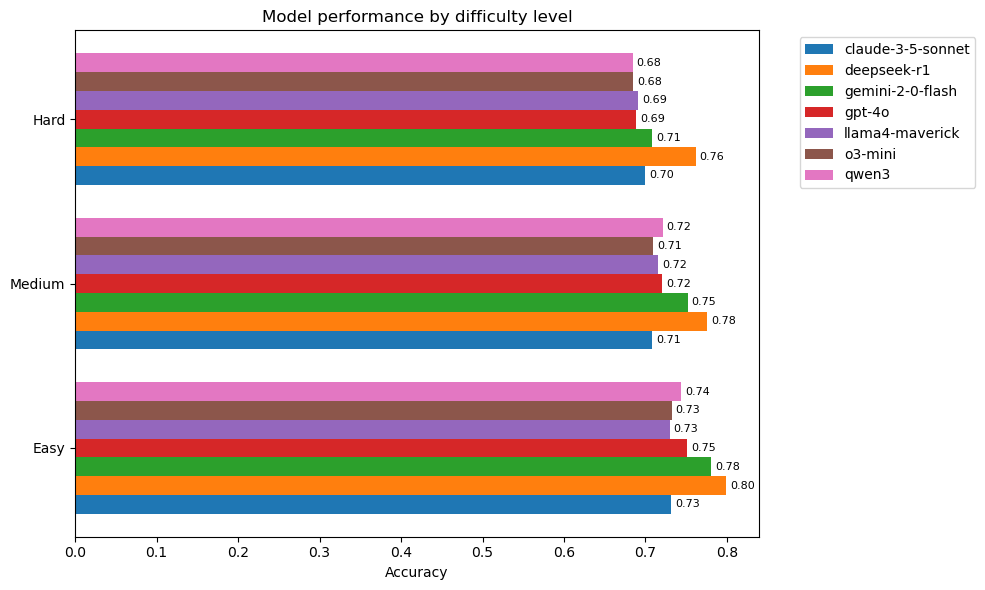

In [175]:
categories = ["Easy", "Medium", "Hard",
            #    "All"
               ]
y = np.arange(len(categories))  # positions for each difficulty group

n_models = len(df_res_1)
bar_height = 0.8 / n_models  # total height per group is 0.8, split across models

fig, ax = plt.subplots(figsize=(10, 6))

for i, row in df_res_1.iterrows():
    # shift each model's bars up/down within the group so they appear side-by-side
    bar_positions = y + (i - n_models / 2) * bar_height + bar_height / 2
    bars = ax.barh(
        bar_positions,
        row[categories],
        bar_height,
        label=row["model_run"],
    )

    # add score labels on each bar
    for bar in bars:
        width = bar.get_width()
        ax.text(
            width + 0.005,                          # small offset to the right of bar end
            bar.get_y() + bar.get_height() / 2,
            f"{width:.2f}",
            va="center",
            ha="left",
            fontsize=8,
        )

ax.set_yticks(y)
ax.set_yticklabels(categories)
ax.set_xlabel("Accuracy")
ax.set_title("Model performance by difficulty level")
ax.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()


In [176]:
pass_at_1_cols = [c_ for c_ in df_comb_base.columns if "sf0__run1" in c_]
df_comb_base

df_comb_base_explode = df_comb_base[["id", "difficulty_level", "medical_topic", "correct_answer"] + pass_at_1_cols].explode("medical_topic")

for col_ in pass_at_1_cols:
    df_comb_base_explode[f"{col_}__correct"] = (df_comb_base_explode[col_] == df_comb_base_explode["correct_answer"])

correct_cols = [c_ for c_ in df_comb_base_explode.columns if c_.endswith("correct")]
df_comb_base_explode

,id,difficulty_level,medical_topic,correct_answer,gpt-4o__sf0__run1,o3-mini__sf0__run1,llama4-maverick__sf0__run1,claude-3-5-sonnet__sf0__run1,gemini-2-0-flash__sf0__run1,deepseek-r1__sf0__run1,qwen3__sf0__run1,gpt-4o__sf0__run1__correct,o3-mini__sf0__run1__correct,llama4-maverick__sf0__run1__correct,claude-3-5-sonnet__sf0__run1__correct,gemini-2-0-flash__sf0__run1__correct,deepseek-r1__sf0__run1__correct,qwen3__sf0__run1__correct
0,33ec4246710149efab9d56f1141847d3,Easy,Urology,D,D,B,D,D,B,D,D,True,False,True,True,False,True,True
0,33ec4246710149efab9d56f1141847d3,Easy,Nephrology,D,D,B,D,D,B,D,D,True,False,True,True,False,True,True
1,ff7c0f1ecd5b4708bb7c6f1617d4b1a8,Easy,Urology,B,C,B,C,C,C,C,C,False,True,False,False,False,False,False
2,d54747bde2c74c308988edd8e0a03d6b,Medium,Nephrology,C,B,C,C,C,C,C,C,False,True,True,True,True,True,True
2,d54747bde2c74c308988edd8e0a03d6b,Medium,Urology,C,B,C,C,C,C,C,C,False,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12485,b747b554cec84ed9aca6351d98b0328a,Medium,Parasitology,B,B,B,B,B,A,B,B,True,True,True,True,False,True,True
12485,b747b554cec84ed9aca6351d98b0328a,Medium,Laboratory Medicine,B,B,B,B,B,A,B,B,True,True,True,True,False,True,True
12486,53802ee8f156412d84837c39417a9fb9,Easy,Parasitology,A,B,B,B,B,A,B,A,False,False,False,False,True,False,True
12486,53802ee8f156412d84837c39417a9fb9,Easy,Laboratory Medicine,A,B,B,B,B,A,B,A,False,False,False,False,True,False,True


In [177]:
df_comb_base_explode["medical_topic"].value_counts().head(10)

medical_topic
Gastroenterology             2510
Obstetrics and Gynecology    2450
Pulmonology                  1854
Infectious Diseases          1819
Endocrinology                1551
Oncology                      841
Pathology                     775
Pediatrics                    775
Radiology                     644
Surgery                       618
Name: count, dtype: int64

In [178]:
top_10_topics = df_comb_base_explode["medical_topic"].value_counts().index[:10].tolist()
top_10_topics

['Gastroenterology',
 'Obstetrics and Gynecology',
 'Pulmonology',
 'Infectious Diseases',
 'Endocrinology',
 'Oncology',
 'Pathology',
 'Pediatrics',
 'Radiology',
 'Surgery']

In [179]:
df_comb_base_explode["medical_topic"].value_counts().head(10)

medical_topic
Gastroenterology             2510
Obstetrics and Gynecology    2450
Pulmonology                  1854
Infectious Diseases          1819
Endocrinology                1551
Oncology                      841
Pathology                     775
Pediatrics                    775
Radiology                     644
Surgery                       618
Name: count, dtype: int64

In [180]:

df_perf = df_comb_base_explode[df_comb_base_explode["medical_topic"].isin(top_10_topics)].groupby("medical_topic")[correct_cols].mean()
df_perf.columns = [c_.split("__")[0] for c_ in df_perf.columns]
df_perf["count"] = df_comb_base_explode["medical_topic"].value_counts().head(10)
df_perf = df_perf.loc[top_10_topics].reset_index(drop=False)
df_perf.to_clipboard()
df_perf

,medical_topic,gpt-4o,o3-mini,llama4-maverick,claude-3-5-sonnet,gemini-2-0-flash,deepseek-r1,qwen3,count
0,Gastroenterology,0.720717,0.731873,0.733068,0.724303,0.770120,0.814741,0.740239,2510
1,Obstetrics and Gynecology,0.746122,0.697959,0.722857,0.741224,0.771837,0.797143,0.715510,2450
2,Pulmonology,0.708738,0.708198,0.681230,0.686624,0.740022,0.773463,0.702265,1854
3,Infectious Diseases,0.732270,0.722375,0.717427,0.716328,0.761957,0.777900,0.717427,1819
4,Endocrinology,0.769181,0.767892,0.763378,0.756286,0.782721,0.812379,0.780142,1551
5,Oncology,0.758621,0.757432,0.765755,0.751486,0.796671,0.826397,0.774078,841
6,Pathology,0.712258,0.676129,0.691613,0.709677,0.741935,0.781935,0.730323,775
7,Pediatrics,0.677419,0.674839,0.645161,0.686452,0.683871,0.731613,0.672258,775
8,Radiology,0.708075,0.720497,0.695652,0.692547,0.748447,0.774845,0.701863,644
9,Surgery,0.687702,0.668285,0.687702,0.686084,0.713592,0.758900,0.687702,618


In [181]:
df_res_1


,model_run,Easy,Medium,Hard,All,All_Ensemble,Ensemble_Improvement
0,claude-3-5-sonnet,0.731238,0.707651,0.699922,0.714618,0.723143,0.008526
1,deepseek-r1,0.798881,0.775381,0.761496,0.781693,0.784193,0.002500
2,gemini-2-0-flash,0.780345,0.751798,0.708496,0.756748,0.763015,0.006266
3,gpt-4o,0.751097,0.720644,0.688576,0.727382,0.738044,0.010662
4,llama4-maverick,0.729506,0.715375,0.691348,0.717560,0.724572,0.007011
5,o3-mini,0.732147,0.709186,0.684417,0.714206,0.720170,0.005964
6,qwen3,0.743671,0.720983,0.684087,0.724663,0.733963,0.009300


# Pricing

In [101]:
df_comb_base

,id,difficulty_level,medical_topic,question,options,correct_answer,correct_index,gpt-4o__sf0__run1,gpt-4o__sf0__run2,gpt-4o__sf0__run3,...,gpt-4o-agg,o3-mini-agg,llama4-maverick-agg,claude-3-5-sonnet-agg,qwen3-agg,gemini-2-0-flash-agg,deepseek-r1-agg,qwen3__sf0__run1,qwen3__sf1__run1,qwen3__sf2__run1
0,33ec4246710149efab9d56f1141847d3,Easy,"[Urology, Nephrology]",Yếu tố thuận lợi hình thành sỏi là gì?,"[Nam giới., Thừa cân., Tuổi <40 tuổi., Ăn uống...",D,3,D,D,D,...,D,B,D,D,D,B,D,D,D,D
1,ff7c0f1ecd5b4708bb7c6f1617d4b1a8,Easy,[Urology],Tiểu máu cuối dòng thường do tổn thương ở:,"[Niệu quản, Bàng quang, Niệu đạo, Thận]",B,1,C,C,C,...,C,B,C,C,C,C,C,C,B,C
2,d54747bde2c74c308988edd8e0a03d6b,Medium,"[Nephrology, Urology]",Nguyên nhân của tiểu máu là:,"[Nhiễm trùng huyết., U xơ tiền liệt tuyến., Vi...",C,2,B,C,B,...,C,C,C,C,C,C,C,C,C,C
3,f2866faa628243e7b864d9babbb1e48a,Easy,"[Nephrology, Urology]",Đặc điểm của cơn đau quặn thận?,"[Âm ỉ, kéo dài, lan từ hông lưng xuống dưới., ...",C,2,C,C,C,...,C,C,C,D,C,D,C,C,C,C
4,098b4e461dec44428168dccbe22787de,Medium,"[Nephrology, Urology]",Urobilinogen trong nước tiểu tăng lên trong tr...,"[tất cả, Thiếu máu tan huyết, sốt rét, sung hu...",A,0,B,B,B,...,B,B,A,A,A,A,A,A,A,B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12483,16ccaeba2927462c8d26b847a9adbe23,Easy,"[Toxicology, Nephrology, Laboratory Medicine]",Nồng độ chì trong máu gây tổn thương thận:,"[10-25 µg /Dl, 25-60 µg /dL, 60-80 µg /dL, >80...",B,1,D,D,D,...,D,D,B,D,C,D,D,C,C,C
12484,fff2247e855c49989cc3a842b6340204,Medium,"[Cardiology, Laboratory Medicine]",Chọn tập hợp các xét nghiệm cần thiết để đánh ...,"[Cholesterol toàn phần, Triglycerid]",A,0,A,A,A,...,A,A,A,A,A,A,A,None,A,A
12485,b747b554cec84ed9aca6351d98b0328a,Medium,"[Parasitology, Laboratory Medicine]",Cơ sở của xét nghiệm gián tiếp,"[Phản ứng của cơ thể ký chủ khi bị ký sinh, Ph...",B,1,B,B,B,...,B,B,B,B,B,B,B,B,B,B
12486,53802ee8f156412d84837c39417a9fb9,Easy,"[Parasitology, Laboratory Medicine]",Bệnh phẩm cần lấy khi bị amibe ruột,"[Phân, Chất nhờn trong phân, Dịch tá tràng, Máu]",A,0,B,B,A,...,A,A,B,B,A,A,B,A,A,A


In [102]:
cnt_input_token_per_question = (
    df_comb_base["question"].apply(lambda x: len(x.split(" "))).mean() # Questions
    + df_comb_base["options"].apply(lambda x: len(" ".join(x).split(" "))).mean() # answers
    + len((gpt_qa_simple_prompt_system + gpt_qa_simple_prompt_user).split(" "))
) * 4/3

In [ ]:
cost_per_1000k_answers = dict()

# qwen3
df_data__ = pd.read_csv("../<placeholder>-interim/file_manual_v2/qwen-3/Qwen/Qwen3-32B/output-shuffled0.csv")
output_token_price = df_data__["answer0"].apply(lambda x: len(x.strip().split(" ")) * 4/3).mean() / 10**6 * 1000 * 0.39
print(f"Qwen3: {output_token_price:.2f} $/1000k Output questions")
input_token_price = cnt_input_token_per_question /10**6 * 1000 * 0.29
print(f"Qwen3: {input_token_price:.2f} $/1000k Input Questions")
cost_per_1000k_answers["qwen3"] = output_token_price + input_token_price
cost_per_1000k_answers

Qwen3: 0.21 $/1000k Output questions
Qwen3: 0.04 $/1000k Input Questions


{'qwen3': 0.2579773969855902}

In [104]:
output_token_price

0.21385702115812918

In [105]:
# OpenAI
def calculate_cost_per_1000k_answers(
        path_to_processed_jsonl, 
        price_per_1M_input_tokens, 
        price_per_1M_output_tokens,
        input_token_cnt_key="prompt_tokens",
        output_token_cnt_key="completion_tokens"):
    n_answers = 0
    total_input_tokens = 0
    total_output_tokens = 0
    
    for row in read_jsonl(path_to_processed_jsonl):
        # Get the number of input tokens
        input_tokens = row["response"]["body"]["usage"][input_token_cnt_key]
        total_input_tokens += input_tokens

        # Get the number of output tokens
        output_tokens = row["response"]["body"]["usage"][output_token_cnt_key]
        total_output_tokens += output_tokens

        n_answers += 1
    # Calculate the cost
    avg_input_tokens = total_input_tokens / n_answers
    avg_output_tokens = total_output_tokens / n_answers
    cost = (avg_input_tokens / 10**3 * price_per_1M_input_tokens) + (avg_output_tokens / 10**3 * price_per_1M_output_tokens)
    
    return cost, avg_input_tokens, avg_output_tokens

In [ ]:
cost, avg_input_tok, avg_output_tok = calculate_cost_per_1000k_answers(
    "../<placeholder>-interim/file_manual_v2/final-data-7k/gpt-standard-o3-mini_data-processed-shuffled0_batch_e1aef5aa-ff95-4f64-ac58-3745ea2cc82a_output.jsonl", 
    0.55, 
    2.2
)
cost_per_1000k_answers["o3-mini"] = cost

In [107]:
avg_input_tok

242.3569140788191

In [108]:
avg_output_tok

604.4085781924523

In [ ]:
cost, avg_input_tok, avg_output_tok = calculate_cost_per_1000k_answers(
    "../<placeholder>-interim/file_manual_v2/final-data-7k/gpt-standard-gpt-4o_data-processed-shuffled0_batch_4dd0fcb2-7d53-4c6e-9552-5ffab741659b_output.jsonl", 
    1.25, 
    5
)
cost_per_1000k_answers["gpt-4o"] = cost

In [ ]:
# Gemini use the same as gpt-4o regarding number of tokens
# Only price is different
cost, avg_input_tok, avg_output_tok = calculate_cost_per_1000k_answers(
    "../<placeholder>-interim/file_manual_v2/final-data-7k/gpt-standard-gpt-4o_data-processed-shuffled0_batch_4dd0fcb2-7d53-4c6e-9552-5ffab741659b_output.jsonl", 
    0.1, 
    0.4
)
cost_per_1000k_answers["gemini-2-0-flash"] = cost

In [ ]:
cost, avg_input_tok, avg_output_tok = calculate_cost_per_1000k_answers(
    "../<placeholder>-interim/file_manual_v2/claude-3-5-sonnet/claude-3-5-sonnet_data-processed-shuffled0_run1.jsonl", 
    1.5, 
    7.5,
    input_token_cnt_key="input_tokens",
    output_token_cnt_key="output_tokens"
)
cost_per_1000k_answers["claude-3-5-sonnet"] = cost

In [112]:
# Use number of tokens from o3-mini
cost_per_1000k_answers["deepseek-r1"] = (
    242.3569140788191 * 1.35 + 604.4085781924523 * 5.4
) / 10**3

In [ ]:
cost, avg_input_tok, avg_output_tok = calculate_cost_per_1000k_answers(
    "../<placeholder>-interim/file_manual_v2/llama4-maverick/llama-4-maverick-17b-128e-instruct_data-processed-shuffled0_run1.jsonl", 
    0.12, 
    0.485
)
cost_per_1000k_answers["llama4-maverick"] = cost



In [114]:
cost_per_1000k_answers

{'qwen3': 0.2579773969855902,
 'o3-mini': 1.4629951747667456,
 'gpt-4o': 0.33794614259852385,
 'gemini-2-0-flash': 0.02703569140788191,
 'claude-3-5-sonnet': 0.4199832962138084,
 'deepseek-r1': 3.5909881562456487,
 'llama4-maverick': 0.025514409799554563}

In [115]:
df_res_1["cost_per_1k_answers"] = df_res_1["model_run"].map(cost_per_1000k_answers)
df_res_1

,model_run,Easy,Medium,Challenging,All,All_Ensemble,Ensemble_Improvement,cost_per_1k_answers
0,claude-3-5-sonnet,0.731238,0.707651,0.705784,0.714618,0.723143,0.008526,0.419983
1,deepseek-r1,0.798881,0.775381,0.770327,0.781693,0.784193,0.002500,3.590988
2,gemini-2-0-flash,0.780345,0.751798,0.717519,0.756748,0.763015,0.006266,0.027036
3,gpt-4o,0.751097,0.720644,0.691919,0.727382,0.738044,0.010662,0.337946
4,llama4-maverick,0.729506,0.715375,0.696563,0.717560,0.724572,0.007011,0.025514
5,o3-mini,0.732147,0.709186,0.685762,0.714206,0.720170,0.005964,1.462995
6,qwen3,0.743671,0.720983,0.687919,0.724663,0.733963,0.009300,0.257977


In [116]:
df_res_1.to_clipboard()

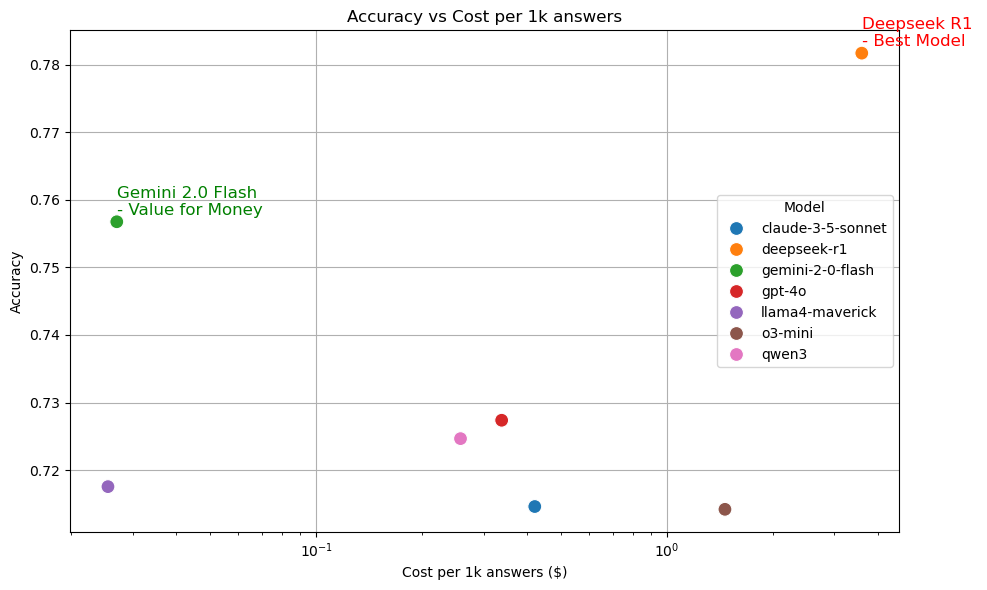

In [117]:
# scatter plot using seaborn, column All as y and cost_per_1k_answers as x
# use log scale for x axis
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df_res_1, 
    x="cost_per_1k_answers", 
    y="All", 
    hue="model_run",
    s=100
)
plt.xscale("log")
plt.xlabel("Cost per 1k answers ($)")
plt.ylabel("Accuracy")
plt.title("Accuracy vs Cost per 1k answers")
plt.grid()
# Highlight deepseek-r1 as best model and gemini-2-0-flash as value for money
for i, row in df_res_1.iterrows():
    if row["model_run"] == "deepseek-r1":
        plt.text(row["cost_per_1k_answers"], row["All"] + 0.001, "Deepseek R1 \n- Best Model", fontsize=12, color="red")
    elif row["model_run"] == "gemini-2-0-flash":
        plt.text(row["cost_per_1k_answers"], row["All"] + 0.001, "Gemini 2.0 Flash \n- Value for Money", fontsize=12, color="green")
plt.legend(title="Model")
plt.tight_layout()

plt.show()
